<a href="https://colab.research.google.com/github/Kei-t76/Toy-problem/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
lr = 0.0001
n_iter = 280

In [3]:
def run(lr, n_iter):
    #x, yの初期値
    x = torch.tensor(0.5, requires_grad = True)
    y = torch.tensor(-0.4, requires_grad = True)
    obj = (1 + x**2) * (100 - y**2)

    #SGD
    optimizer = optim.SGD([x,y], lr=lr)

    x_hist = []
    y_hist = []
    obj_list = []
    #(x, y)とsattle point(0, 0)の距離
    norm_list = []

    for i in range(n_iter):
        #更新
        obj.backward()
        optimizer.step()

        #更新したx, yをnumpy型に変換
        np_x = x.detach().numpy()
        np_y = y.detach().numpy()


        norm = np.sqrt(np_x ** 2 + np_y ** 2)
        obj = (1 + x**2) * (100 - y**2)

        #リストに追加
        x_hist.append(np_x.copy())
        y_hist.append(np_y.copy())
        obj_list.append(obj.detach().numpy())
        norm_list.append(norm)

    print (x, y, obj, norm)
    return x_hist, y_hist, obj_list, norm_list

In [4]:
res_sgd = run(lr, n_iter)

tensor(-2.9920, requires_grad=True) tensor(-14.2471, requires_grad=True) tensor(-1024.8484, grad_fn=<MulBackward0>) 14.557862


Text(0, 0.5, 'SGD')

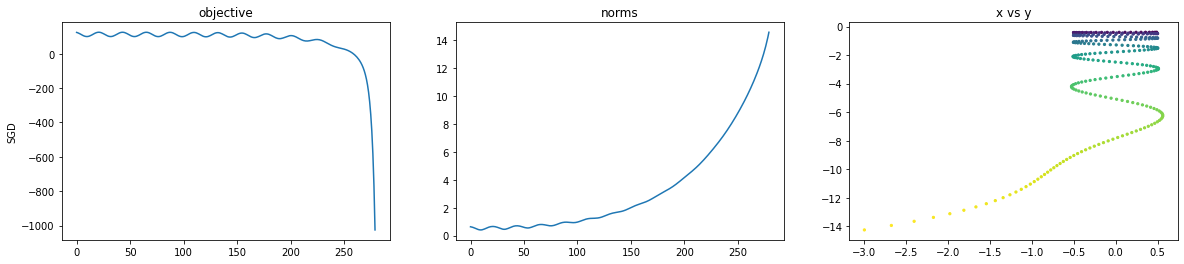

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))


ax[0].plot(res_sgd[2])
ax[1].plot(res_sgd[3])
ax[2].scatter(res_sgd[0], res_sgd[1], s=5.0, alpha=1.0, c=np.arange(0, len(res_sgd[0]), 1), cmap=cm.viridis)

ax[0].set_title("objective")
ax[1].set_title("norms")
ax[2].set_title("x vs y")
ax[0].set_ylabel("SGD")